In [1]:
# This is an ongoing project-I am interested in diving in further in the dataset and improve the model further. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/stroke_data.csv')

In [4]:
#get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29065 non-null  object 
 1   age                29065 non-null  float64
 2   hypertension       29065 non-null  int64  
 3   heart_disease      29065 non-null  int64  
 4   ever_married       29065 non-null  object 
 5   work_type          29065 non-null  object 
 6   Residence_type     29065 non-null  object 
 7   avg_glucose_level  29065 non-null  float64
 8   bmi                29065 non-null  float64
 9   smoking_status     29065 non-null  object 
 10  stroke             29065 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.4+ MB


In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [6]:
df.index

RangeIndex(start=0, stop=29065, step=1)

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
#checking on missing data
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#feature engineering--create dummy variables for object data type
#gender, ever_married and residence_type are dichotomies, while work-type has five different categories and smoking_status has three categories 
df['work_type'].value_counts()

Private          18950
Self-employed     5204
Govt_job          4195
children           615
Never_worked       101
Name: work_type, dtype: int64

In [10]:
df['smoking_status'].value_counts()

never smoked       15746
formerly smoked     7093
smokes              6226
Name: smoking_status, dtype: int64

In [11]:
df['gender'].value_counts()

Female    17852
Male      11213
Name: gender, dtype: int64

In [12]:
df['ever_married'].value_counts()

Yes    21687
No      7378
Name: ever_married, dtype: int64

In [13]:
df['Residence_type'].value_counts()

Urban    14592
Rural    14473
Name: Residence_type, dtype: int64

In [14]:
#create dummy variables for dichotomies
### two methods to turn binary categories into numeric - pd.get_dummies or write a function to pass in

In [15]:
def genderCode(gender):
	return 1 if gender == 'Male' else 0
df['gender_coded'] = df['gender'].apply(lambda x: genderCode(x))

In [16]:
def resCode(residence):
	return 0 if residence == 'Rural' else 1
df['res_coded'] = df['Residence_type'].apply(lambda x: resCode(x))

In [17]:
c = pd.get_dummies(df['ever_married'], prefix='married', drop_first = True)
df = pd.concat([df, c], axis=1)

In [18]:
#convert 'work_type' (multiple categories) to numeric using sklearn.preprocessing, and concatenate to df
from sklearn.preprocessing import OrdinalEncoder
t = OrdinalEncoder()
t_code = t.fit_transform(df[['work_type']]).astype(int)
t_code = pd.DataFrame(t_code, columns=['work_coded'])
df = pd.concat([df, t_code], axis=1)

In [19]:
#convert 'smoking_status'
def smokeCode(smstatus):
	if smstatus == 'never smoked':
		return 0
	elif smstatus == 'formerly smoked':
		return 1
	else:
		return 2

df['smstatus'] = df['smoking_status'].apply(lambda x: smokeCode(x))

In [21]:
#second method
#w = t.fit_transform(df[['smoking_status']]).astype(int)
#w_code = pd.DataFrame(w, columns=['smstatus'])
#df = pd.concat([df, w_code], axis=1)

In [22]:
#drop all the object data types
df = df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                29065 non-null  float64
 1   hypertension       29065 non-null  int64  
 2   heart_disease      29065 non-null  int64  
 3   avg_glucose_level  29065 non-null  float64
 4   bmi                29065 non-null  float64
 5   stroke             29065 non-null  int64  
 6   gender_coded       29065 non-null  int64  
 7   res_coded          29065 non-null  int64  
 8   married_Yes        29065 non-null  uint8  
 9   work_coded         29065 non-null  int64  
 10  smstatus           29065 non-null  int64  
dtypes: float64(3), int64(7), uint8(1)
memory usage: 2.2 MB


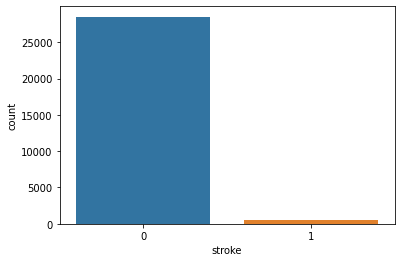

In [24]:
#exploratory data analysis
sns.countplot(x='stroke', data=df)

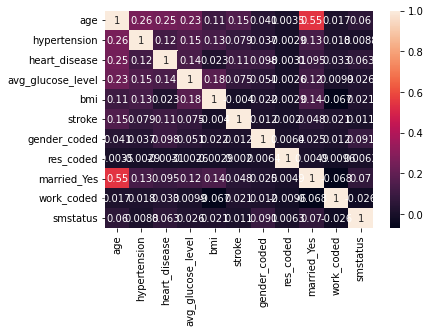

In [25]:
sns.heatmap(df.corr(), annot=True)

In [26]:
#perform train_test_split
from sklearn.model_selection import train_test_split
x=df.drop('stroke', axis=1)
y=df['stroke']
x = x.values
y=y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =101)

In [28]:
#normalize x
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [29]:
#NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
x_train.shape
n_model = Sequential()
n_model.add(Dense(10, activation = 'relu'))
n_model.add(Dropout(0.2))
n_model.add(Dense(5, activation = 'relu'))
n_model.add(Dropout(0.2))
n_model.add(Dense(3, activation = 'relu'))
n_model.add(Dropout(0.2))
n_model.add(Dense(1, activation='sigmoid'))
n_model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
n_model.fit(x=x_train, y=y_train, epochs=10, verbose=False, batch_size=128, validation_data=(x_test, y_test))

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = (n_model.predict(x_test) > 0.5) *1
print(confusion_matrix(y_test, predictions))

[[8570    0]
 [ 150    0]]


In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9827981651376146
